In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

In [174]:
data = pd.read_csv("zoo.csv")
data.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [175]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["animal_name"] = le.fit_transform(data["animal_name"])
data.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal_name  101 non-null    int64
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  class_type   101 non-null    int64
dtypes: int64(18)
memory usage: 14.3 KB


In [177]:
data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [178]:
# X = data.drop(columns=["animal_name"])
# X.head(2)

In [179]:
print(len(set(data["animal_name"])))
print(set(data["animal_name"]))

100
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}


# Dendrogram

In [180]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [181]:
#Generate the linkage matrix
Z = linkage(data, 'average')

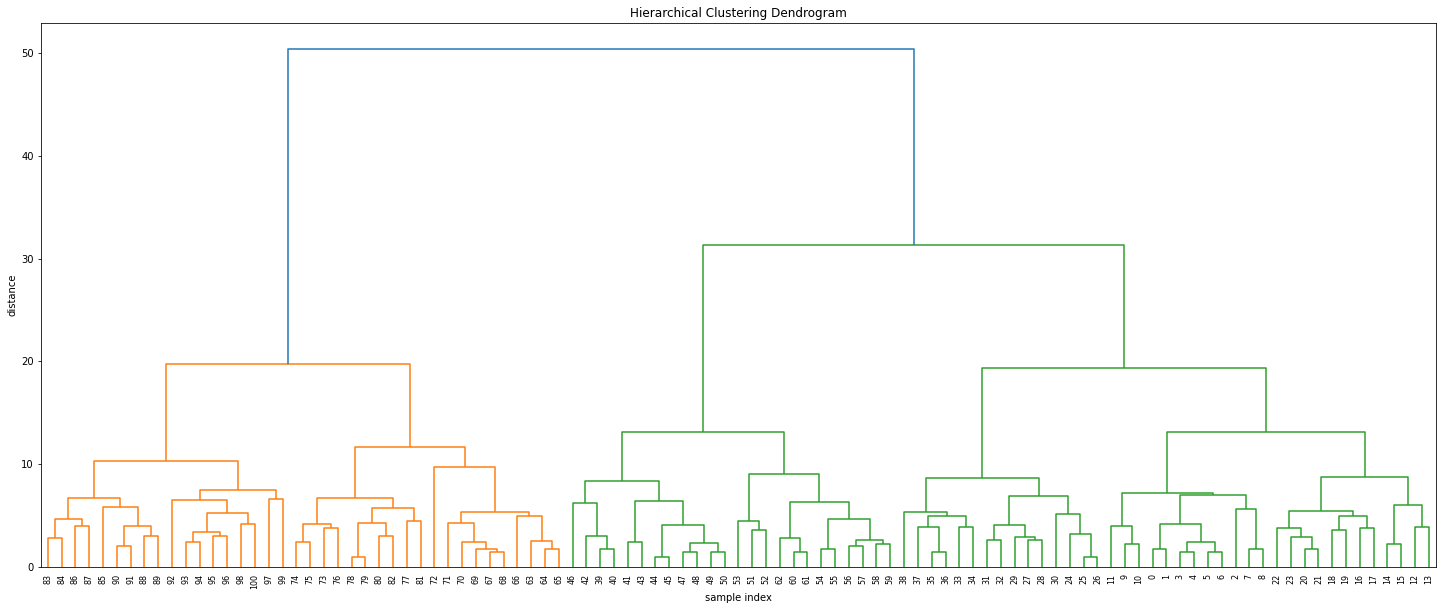

In [182]:
#Calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  #Rotates the x axis labels
    leaf_font_size=8.,  #Font size for the x axis labels
)
plt.show()

# Agglomerative Clustering

## Cluster Number = 2

In [183]:
from sklearn.cluster import AgglomerativeClustering
cluster_3 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
pred = cluster_3.fit_predict(data)
# print(pred)

In [184]:
# Cluster Labels
print(cluster_3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


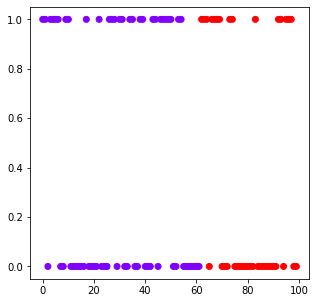

In [185]:
plt.figure(figsize=(5, 5))
plt.scatter(data.values[:,0], data.values[:,1], c=cluster_3.labels_, cmap='rainbow')
plt.show()

## Cluster Number = 3

In [186]:
from sklearn.cluster import AgglomerativeClustering
cluster_4 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
pred = cluster_4.fit_predict(X)
# print(pred)

In [187]:
# Cluster Labels
print(cluster_4.labels_)

[0 0 2 0 0 0 0 2 2 0 0 0 2 2 1 1 0 0 2 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 2 0 0
 0 2 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 2
 0 0 2 2 0 0 2 2 2 0 0 1 2 0 1 1 1 1 2 0 0 0 0 1 0 2 0]


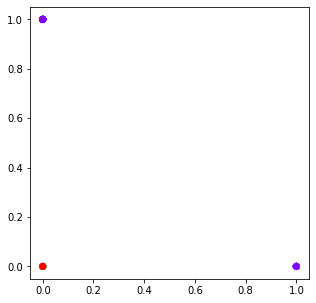

In [188]:
plt.figure(figsize=(5, 5))
plt.scatter(data.values[:,1], data.values[:,2], c=cluster_4.labels_, cmap='rainbow')
plt.show()

# KMeans Clustering

In [189]:
from sklearn.cluster import KMeans

## Apply Elbow method

[84621.36633663366, 21518.095686274508, 10007.780086580087, 5997.364548494983, 3999.506641604009, 2958.5122549019607, 2323.9304487179493, 1931.986263736264, 1640.9090909090908]


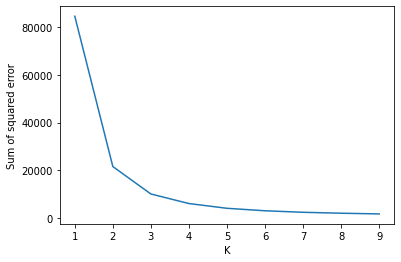

In [190]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data.values[:,:-1])
    sse.append(km.inertia_)
print(sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

## Clustr Number = 2

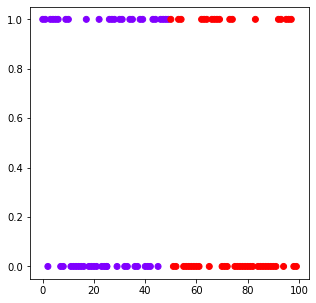

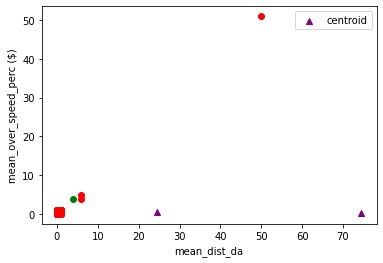

In [191]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data)
y_predicted = [int(i) for i in y_predicted]

plt.figure(figsize=(5, 5))
plt.scatter(data.values[:,0], data.values[:,1], c=km.labels_, cmap='rainbow')
plt.show()

data['cluster']=y_predicted
df = data

df1 = df.values[df.cluster==0]
df2 = df.values[df.cluster==1]
# df3 = df.values[df.cluster==2]

plt.scatter(df1[0],df1[1],color='green')
plt.scatter(df2[0],df2[1],color='red')
# plt.scatter(df3[0],df3[1],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='^',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()
plt.show()

In [192]:
data.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0


## Cluster Number = 3

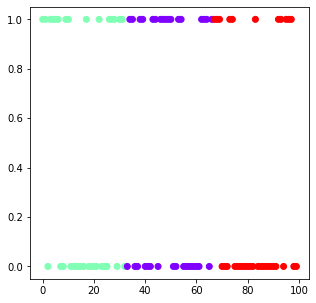

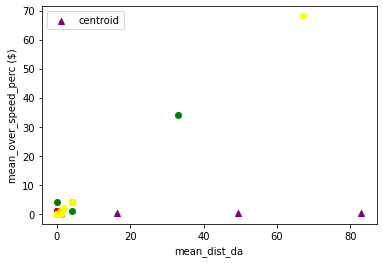

In [193]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data)
y_predicted = [int(i) for i in y_predicted]

plt.figure(figsize=(5, 5))
plt.scatter(data.values[:,0], data.values[:,1], c=km.labels_, cmap='rainbow')
plt.show()

data['cluster']=y_predicted
df = data

df1 = df.values[df.cluster==0]
df2 = df.values[df.cluster==1]
df3 = df.values[df.cluster==2]

plt.scatter(df1[0],df1[1],color='green')
plt.scatter(df2[0],df2[1],color='red')
plt.scatter(df3[0],df3[1],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='^',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()
plt.show()

In [194]:
data.head(3)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1


                                            -:END:-